# Predicting Stock Prices of a S&P 500 Stock
This project's central hypothesis is based on the notion that patterns and trends in past stock prices and other financial data can be used to forecast future movements. Through the application of machine learning algorithms, especially those skilled in identifying intricate patterns, the model is able to examine enormous volumes of historical data and pinpoint the fundamental relationships that influence stock values. With the use of cutting-edge computer methods and historical stock data, this research seeks to produce accurate projections that will facilitate better decision-making.

In [40]:
# Project Imports
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [41]:
# Downloading and displaying the top 5 rows of data for Alphabet Inc.(GOOGL)
stock_data = yf.download('GOOGL', start='2020-01-01', end='2023-07-1')
stock_data.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,67.420502,68.433998,67.324501,68.433998,68.355545,27278000
2020-01-03,67.400002,68.687500,67.365997,68.075996,67.997955,23408000
2020-01-06,67.581497,69.916000,67.550003,69.890503,69.810379,46768000
2020-01-07,70.023003,70.175003,69.578003,69.755501,69.675537,34330000
2020-01-08,69.740997,70.592499,69.631500,70.251999,70.171463,35314000


In [42]:
# Filling in the missing values in the dataset
stock_data.fillna(method='ffill', inplace=True)

# Adding new columns to the dataset
stock_data['Moving_Avg_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['Moving_Avg_200'] = stock_data['Close'].rolling(window=200).mean()
stock_data['Daily_Return'] = stock_data['Close'].pct_change()

# Getting rid of rows with NaN values
stock_data.dropna(inplace=True)
stock_data



,Open,High,Low,Close,Adj Close,Volume,Moving_Avg_50,Moving_Avg_200,Daily_Return
Date,,,,,,,,,
2020-10-15,77.224998,78.570000,77.056503,77.773499,77.684341,31210000,76.33275,70.771625,-0.005098
2020-10-16,78.091499,78.885498,77.883003,78.385002,78.295143,34194000,76.39550,70.821380,0.007863
2020-10-19,78.796501,79.196503,76.146004,76.497498,76.409805,29734000,76.42708,70.863487,-0.024080
2020-10-20,76.155502,78.692001,76.025002,77.554001,77.465096,41670000,76.48134,70.901805,0.013811
2020-10-21,78.492500,80.757004,78.357002,79.299500,79.208595,60322000,76.58679,70.949525,0.022507
...,...,...,...,...,...,...,...,...,...
2023-06-26,120.760002,122.000000,118.269997,118.339996,118.204330,33969900,116.26460,101.652050,-0.032696
2023-06-27,117.080002,119.080002,116.099998,118.330002,118.194351,39535900,116.45380,101.701800,-0.000084
2023-06-28,117.089996,120.389999,116.849998,120.180000,120.042229,27091400,116.73800,101.749450,0.015634


In [43]:
# Prepare the training and testing data for the model
features = stock_data[['Moving_Avg_50', 'Moving_Avg_200', 'Daily_Return']]
target = stock_data['Close']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Lets see the shapes of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(544, 3) (137, 3) (544,) (137,)


In [44]:
# Initializing and training the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

Mean Squared Error: 5.858798806236066
R-squared: 0.9847609317737988


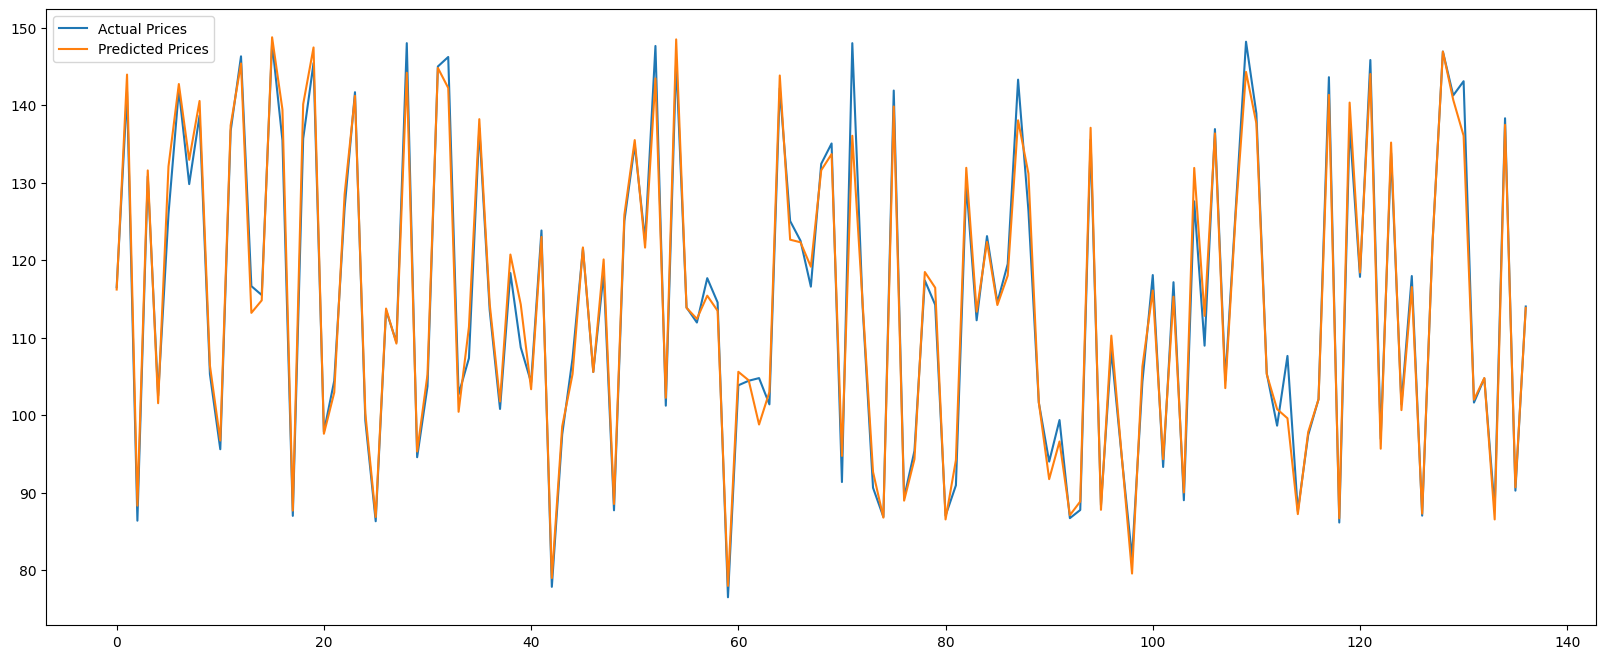

In [45]:
# Making predictions
predictions = model.predict(X_test)

# Calculating and printing the metrics to better visualize our findings
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Lets try to plot the actual vs predicted values
plt.figure(figsize=(20, 8))
plt.plot(y_test.values, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.legend()
plt.show()


**Concluding statements** : I got a R-squared value of 0.9847 which means that almost 98.48% of the variance in the stock prices was explained by this model.
Also I had a fairly low value of MSE (5.8587) which means that there was less error between my predicted and actual values of Alphabet stock prices.